# Лабораторная работа №4
### Линейные модели, SVM и деревья решений.
##### Шиленок Даниил ИУ5-65Б

In [1]:
import seaborn as sns

df = sns.load_dataset('titanic')
df = df.drop(['class','who','adult_male','deck','embark_town','alive'], axis=1)
df = df.dropna()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df['sex'] = LabelEncoder().fit_transform(df['sex'])         # male=1, female=0
df['embarked'] = LabelEncoder().fit_transform(df['embarked'])  # C=0, Q=1, S=2

# Разделяем признаки и целевую переменную
X = df.drop(['survived'], axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

In [3]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)

In [4]:
from sklearn.metrics import accuracy_score, f1_score

print('Логистическая регрессия:')
print(f'Accuracy: {accuracy_score(y_test, log_preds):.3f}')
print(f'F1-score: {f1_score(y_test, log_preds):.3f}')

Логистическая регрессия:
Accuracy: 0.748
F1-score: 0.695


In [5]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear',class_weight='balanced')
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)

In [6]:
print('SVM:')
print(f'Accuracy: {accuracy_score(y_test, svm_preds):.3f}')
print(f'F1-score: {f1_score(y_test, svm_preds):.3f}')

SVM:
Accuracy: 0.748
F1-score: 0.690


In [7]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(max_depth=3, random_state=2)
tree_model.fit(X_train, y_train)
tree_preds = tree_model.predict(X_test)

In [8]:
print('Дерево решений:')
print(f'Accuracy: {accuracy_score(y_test, tree_preds):.3f}')
print(f'F1-score: {f1_score(y_test, tree_preds):.3f}')

Дерево решений:
Accuracy: 0.790
F1-score: 0.732


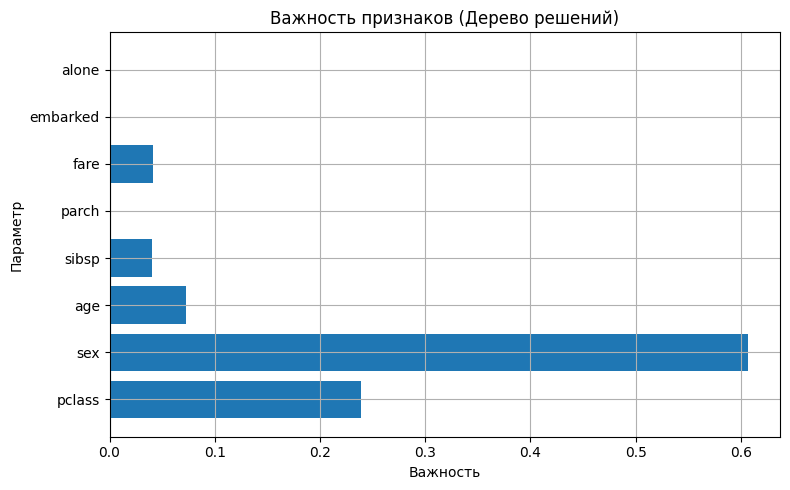

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(X.columns, tree_model.feature_importances_)
plt.title('Важность признаков (Дерево решений)')
plt.xlabel('Важность')
plt.ylabel('Параметр')
plt.grid(True)
plt.tight_layout()
plt.show()

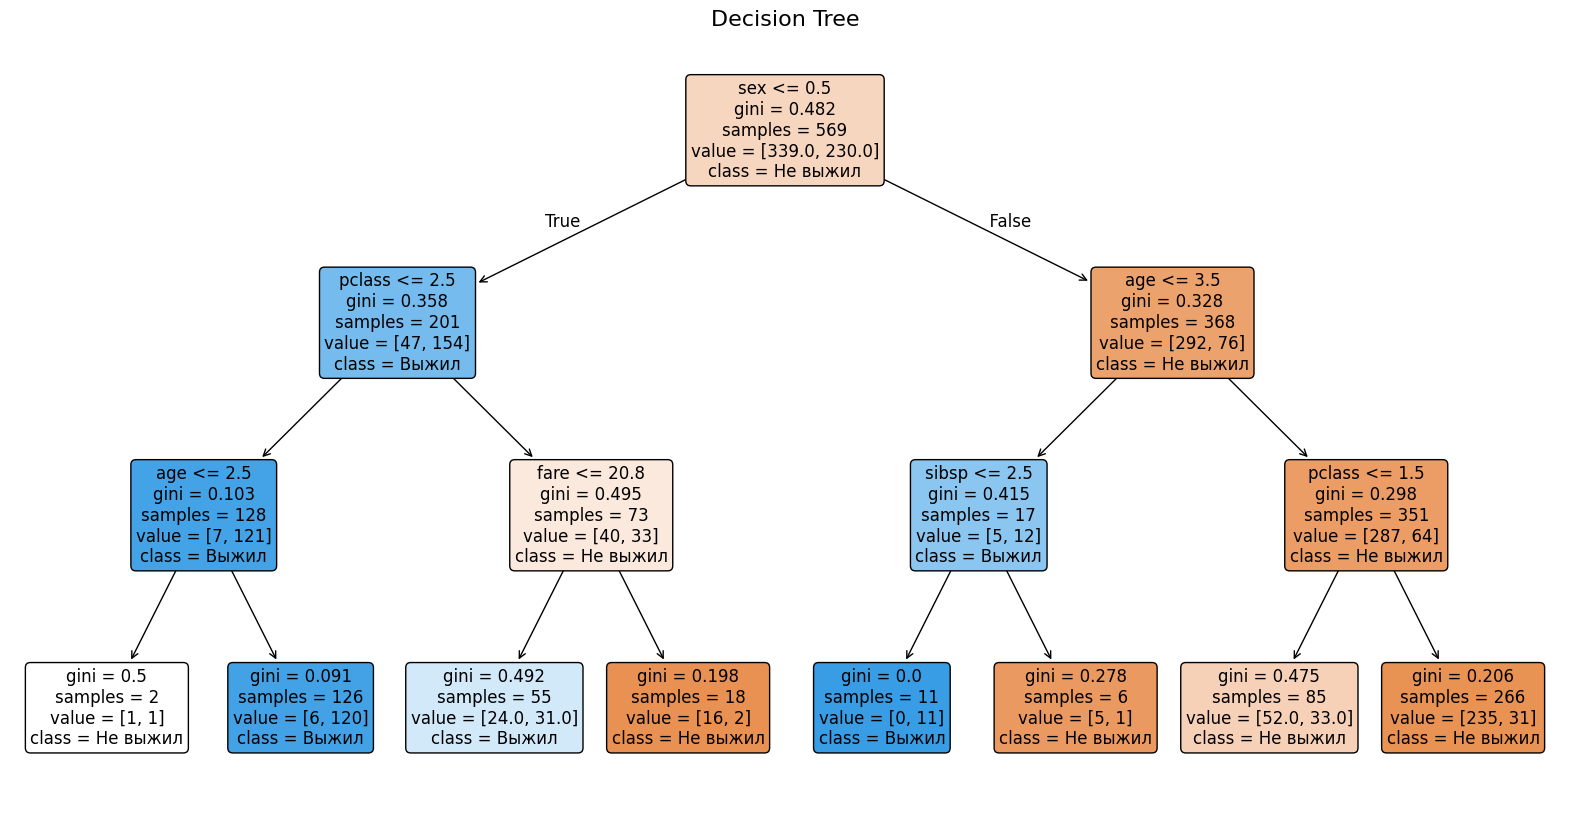

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=["Не выжил", "Выжил"],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title("Decision Tree", fontsize=16)
plt.show()